### Import Libraries

In [2]:
import cv2
import numpy as np

In [2]:
cv2.__version__

'4.2.0'

In [7]:
import os
import matplotlib.pyplot as plt
from IPython.display import clear_output

### Open Camra & Click Frame

In [ ]:
webcam = cv2.VideoCapture(0)
status, image = webcam.read()
cv2.waitKey(10)
webcam.release()        
cv2.destroyAllWindows() 

In [ ]:
plt.imshow(image)

In [ ]:
status

In [ ]:
image.shape

### Create Video streaming

In [3]:
# Open connection to camera
webcam = cv2.VideoCapture(0)

#External Window or in Notebook / Resize
cv2.namedWindow("My Camera", cv2.WINDOW_NORMAL)
while True:
      
    ret, frame = webcam.read()
    cv2.imshow("My Camera", frame) 
     
    # Press q for close window
    #here 10 is a milliseconds
    if cv2.waitKey(10)== ord('q'):
        break
        
webcam.release()        
cv2.destroyAllWindows() 

In [ ]:
ord('A') #Convert to ASCII Code

In [ ]:
plt.imshow(frame)

### Face Detection using Haar Cascades

List of available pretraied models in OpenCV:

<div style="float: left; width: 50%">
<ul>
    <li> haarcascade_eye_tree_eyeglasses  
    <li> haarcascade_mcs_leftear
    <li> haarcascade_eye                  
    <li> haarcascade_mcs_lefteye
    <li> haarcascade_frontalface_alt2   
    <li> haarcascade_mcs_mouth
    <li> haarcascade_frontalface_alt_tree
    <li> haarcascade_mcs_nose
    <li> <font style="color: #be2830">haarcascade_frontalface_alt</font>       
    <li> haarcascade_mcs_rightear
    <li> haarcascade_frontalface_default
</ul>
</div>
<div style="float: right; width: 50%">
<ul>
    <li> haarcascade_mcs_righteye
    <li> haarcascade_fullbody            
    <li> haarcascade_mcs_upperbody
    <li> haarcascade_lefteye_2splits    
    <li> haarcascade_profileface
    <li> haarcascade_lowerbody            
    <li> haarcascade_righteye_2splits
    <li> haarcascade_mcs_eyepair_big     
    <li> haarcascade_smile
    <li> haarcascade_mcs_eyepair_small
    <li> haarcascade_upperbody
</ul>
</div>


### Detecting Faces with OpenCV

### detector = cv2.CascadeClassifier( xml_file_path)

### face_coord = detector.detectMultiScale(image, scale_factor, min_neighbors, min_size, max_size)

#### image : gray scale image where face are detected.


#### scale_factor:Parameter specifying how much the image size is reduced at each image scale.


#### minNeighbors – Parameter specifying how many neighbors each candidate rectangle should have to retain it.


#### minSize – Minimum possible object size. Objects smaller than that are ignored.


#### maxSize – Maximum possible object size. Objects larger than that are ignored.

### Face Detection using OpenCV

In [11]:
faceDetect=cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
# cam = cv2.VideoCapture("dark4.mp4")
cam = cv2.VideoCapture(0)
cv2.namedWindow("Face", cv2.WINDOW_NORMAL)

while True:
    ret,img = cam.read()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = faceDetect.detectMultiScale(img,1.2)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255),1)
        #(image,(x,y),(w,h),border_color,border_thickness)  
        
    cv2.imshow("Face",img)
    if (cv2.waitKey(10)== ord('q')):
        break

cam.release()
cv2.destroyAllWindows()

In [12]:
faces

array([[215,  69, 254, 254]], dtype=int32)

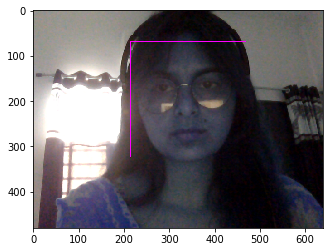

In [13]:
plt.imshow(img)

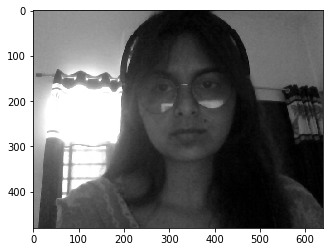

In [14]:
plt.imshow(gray,cmap="gray")

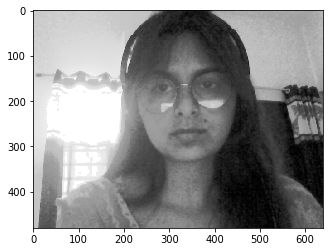

In [18]:
plt.imshow(cv2.equalizeHist(gray),cmap="gray")
# Opencv - BGR
# MATPLOT - RGB

### Project:face Recognition

<h2 align="center" style='color: #be2830'>Build Our Dataset</h2>
<h4 align="center">
Detect $\rightarrow$ Cut $\rightarrow$ Normalize $\rightarrow$ Resize $\rightarrow$ Save</h4>

### detect face

In [19]:
def detect_face(frame):
   
        
    detector = cv2.CascadeClassifier("haarcascade_frontalface_alt.xml")

    faces = detector.detectMultiScale(frame,1.2)
    
    return faces

In [20]:
def gray_scale(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

### Cut face

In [21]:
def cut_faces(image, faces_coord):
    faces = []
      
    for (x, y, w, h) in faces_coord:
        
        faces.append(image[y: y + h, x : x + w ])
         
    return faces

### Normalize faces by increasing pixel intensity(brightness)

In [22]:
def normalize_intensity(images):
    images_norm = []
    for image in images:
        images_norm.append(cv2.equalizeHist(image))
    return images_norm